# Project - Environmental analysis

In [7]:
# --- 1. Import Packages ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")




In [10]:
# --- 2. Define Paths ---
BASE_DIR = "../data/Environmental/"

landcover_path = os.path.join(BASE_DIR, "processed_land_cover/landcover_area_stats.csv")
forestloss_path = os.path.join(BASE_DIR, "processed_forest/forest_loss_yearly_summary.csv")
riverdischarge_path = os.path.join(BASE_DIR, "processed_river_discharge/combined_river_discharge_data.csv")
glaciallake_path = os.path.join(BASE_DIR, "processed_glacier_formation/glacial_lakes_cleaned.csv")


In [11]:
# --- 3. Load Datasets ---
df_landcover = pd.read_csv(landcover_path)
df_forestloss = pd.read_csv(forestloss_path)
df_river = pd.read_csv(riverdischarge_path)
df_glacial = pd.read_csv(glaciallake_path)

print(" Datasets Loaded Successfully!")

 Datasets Loaded Successfully!


In [16]:


# --- 1. Check River Discharge ---
df_river = pd.read_csv(riverdischarge_path)
df_river['date'] = pd.to_datetime(df_river['date'], errors='coerce')
df_river['Year'] = df_river['date'].dt.year
print("River Discharge Years:", df_river['Year'].min(), "to", df_river['Year'].max())

# --- 2. Check Glacial Lakes ---
df_glacial = pd.read_csv(glaciallake_path)
print("Glacial Lake Years:", df_glacial['year'].min(), "to", df_glacial['year'].max())

# --- 3. Check Land Cover ---
df_landcover = pd.read_csv(landcover_path)
print("Land Cover Years:", df_landcover['Year'].min(), "to", df_landcover['Year'].max())

# --- 4. Check Forest Loss ---
df_forestloss = pd.read_csv(forestloss_path)
print("Forest Loss Years:", df_forestloss['Loss_Year'].min(), "to", df_forestloss['Loss_Year'].max())


River Discharge Years: 1962 to 1993
Glacial Lake Years: 1959.0 to 2011.0
Land Cover Years: 2017 to 2024
Forest Loss Years: 2001 to 2001


In [12]:
# --- 4. Preprocessing and Summarization ---

# Land Cover: Filter Forest Class (Class=2)
df_forest_area = df_landcover[df_landcover['Class'] == 2][['Year', 'Area_km2']]
df_forest_area = df_forest_area.rename(columns={'Area_km2': 'Forest_Area_LandCover_km2'})

# Forest Loss: Convert Pixel Count to Hectares
# Each pixel ~0.09 hectares (30m x 30m resolution)
df_forestloss['Forest_Loss_ha'] = df_forestloss['Pixel_Loss_Count'] * 0.09
df_forestloss = df_forestloss.rename(columns={'Loss_Year': 'Year'})[['Year', 'Forest_Loss_ha']]

# River Discharge: Prepare Yearly Mean Discharge
df_river['date'] = pd.to_datetime(df_river['date'], errors='coerce')
df_river['Year'] = df_river['date'].dt.year
df_river_yearly = df_river.groupby('Year')['original'].mean().reset_index()
df_river_yearly = df_river_yearly.rename(columns={'original': 'Mean_Discharge_m3s'})

# Glacial Lakes: Sum Lake Area per Year
df_glacial_yearly = df_glacial.groupby('year')['area_sqkm'].sum().reset_index()
df_glacial_yearly = df_glacial_yearly.rename(columns={'year': 'Year', 'area_sqkm': 'Total_Glacial_Lake_Area_km2'})


In [21]:
# --- Save Combined Dataset ---
COMBINED_DIR = os.path.join(BASE_DIR, "processed_combined/")
os.makedirs(COMBINED_DIR, exist_ok=True)

combined_output_path = os.path.join(COMBINED_DIR, "land_forest_river_glacial_combined_features.csv")
df_combined.to_csv(combined_output_path, index=False)

print(f"✅ Combined Dataset saved at: {combined_output_path}")

✅ Combined Dataset saved at: ../data/Environmental/processed_combined/land_forest_river_glacial_combined_features.csv


In [22]:
# --- 6. Basic Info ---
print("\n Dataset Info:")
print(df_combined.info())

print("\n Summary Statistics:")
print(df_combined.describe())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         56 non-null     float64
 1   Forest_Area_LandCover_km2    8 non-null      float64
 2   Forest_Loss_ha               1 non-null      float64
 3   Mean_Discharge_m3s           32 non-null     float64
 4   Total_Glacial_Lake_Area_km2  29 non-null     float64
dtypes: float64(5)
memory usage: 2.3 KB
None

 Summary Statistics:
              Year  Forest_Area_LandCover_km2  Forest_Loss_ha  \
count    56.000000                   8.000000            1.00   
mean   1989.589286               64197.472875       207719.46   
std      19.108091                2848.214127             NaN   
min    1959.000000               60428.195000       207719.46   
25%    1973.750000               63000.938000       207719.46   
50%    1987.500000 

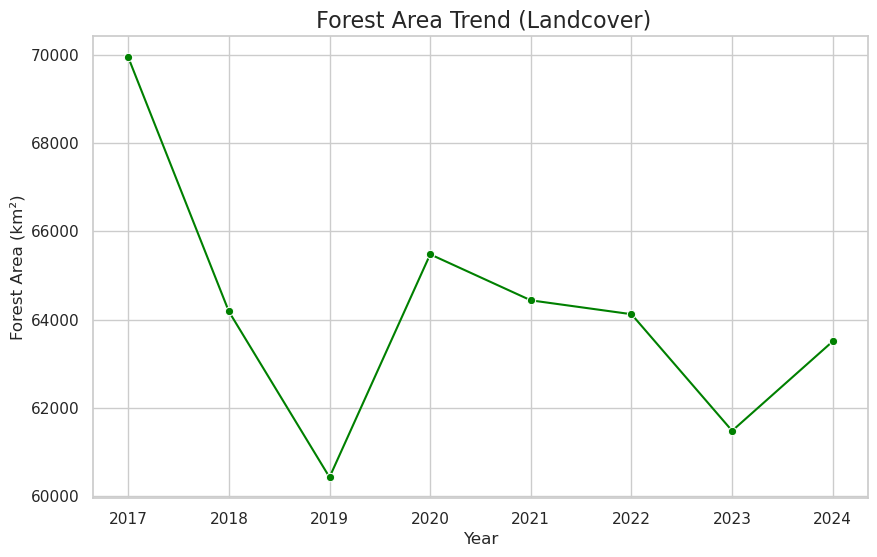

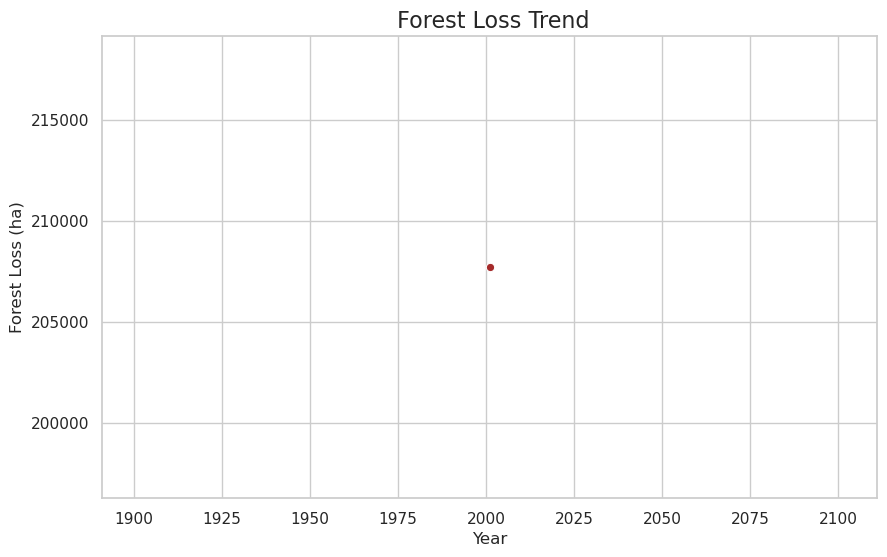

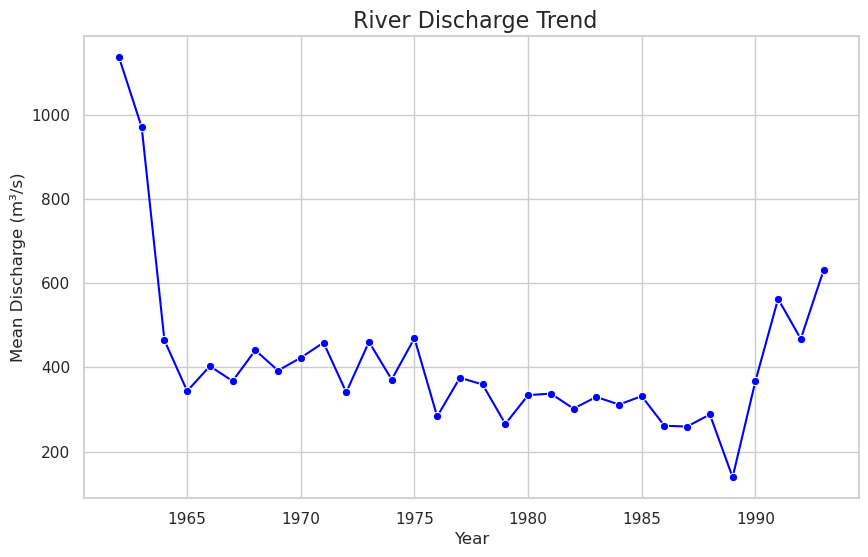

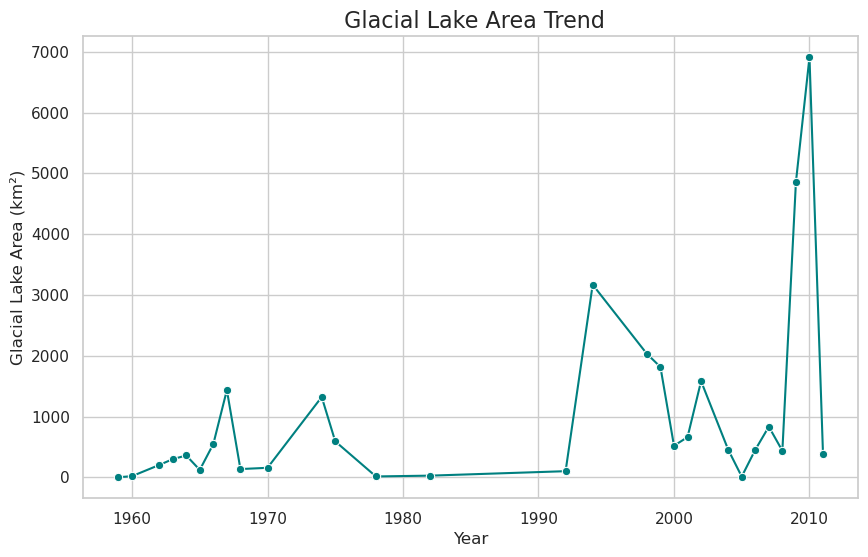

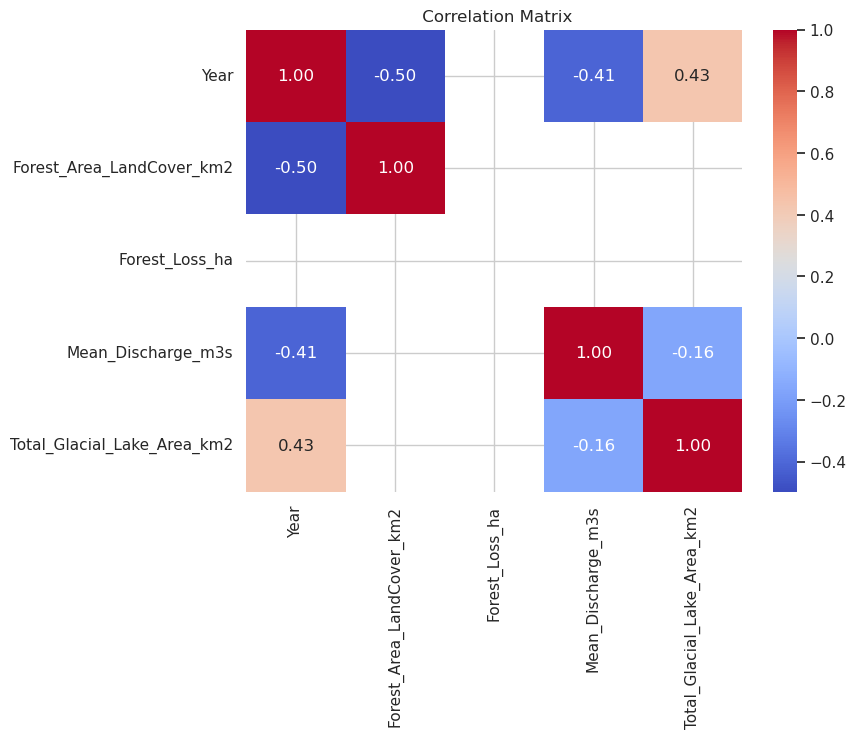

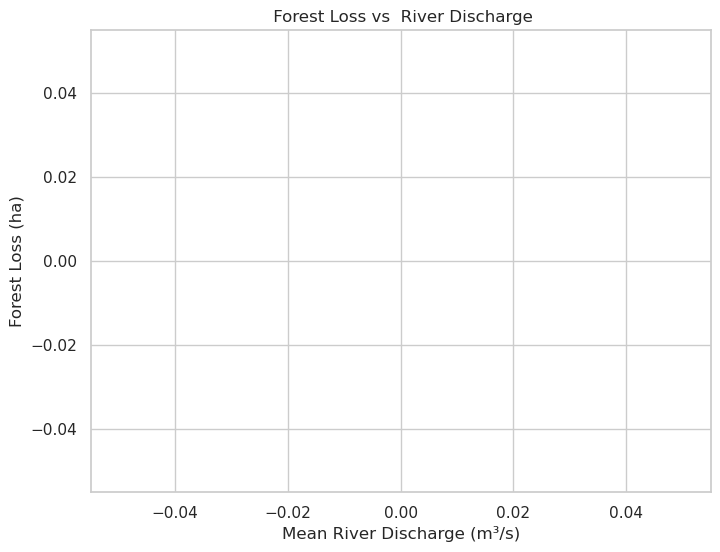


 Full Combined EDA Completed!


In [23]:
# --- 7. EDA Visualizations ---

# Forest Area Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=df_combined, x='Year', y='Forest_Area_LandCover_km2', marker='o', color='green')
plt.title(' Forest Area Trend (Landcover)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Forest Area (km²)')
plt.grid(True)
plt.show()

# Forest Loss Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=df_combined, x='Year', y='Forest_Loss_ha', marker='o', color='brown')
plt.title(' Forest Loss Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Forest Loss (ha)')
plt.grid(True)
plt.show()

# River Discharge Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=df_combined, x='Year', y='Mean_Discharge_m3s', marker='o', color='blue')
plt.title(' River Discharge Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Mean Discharge (m³/s)')
plt.grid(True)
plt.show()

# Glacial Lake Area Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=df_combined, x='Year', y='Total_Glacial_Lake_Area_km2', marker='o', color='teal')
plt.title(' Glacial Lake Area Trend', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Glacial Lake Area (km²)')
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(' Correlation Matrix')
plt.show()

# Scatter Plots: Forest Loss vs River Discharge
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_combined, x='Mean_Discharge_m3s', y='Forest_Loss_ha')
plt.title(' Forest Loss vs  River Discharge')
plt.xlabel('Mean River Discharge (m³/s)')
plt.ylabel('Forest Loss (ha)')
plt.grid(True)
plt.show()

print("\n Full Combined EDA Completed!")

# Feature Engineering

In [24]:
# --- 1. Import Packages ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

sns.set_theme(style="whitegrid")

In [ ]:
# --- 2. Define Paths ---
BASE_DIR = "../data/Environmental/"
BASE_DIR_W = "../data/Weather_&_Climate/"

combined_features_path = os.path.join(BASE_DIR, "processed_combined/land_forest_river_glacial_combined_features.csv")



In [63]:
# --- 2_Feature_Engineering_Environmental_Data_Only.ipynb ---

# --- 1. Import Packages ---
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# --- 2. Define Paths ---
BASE_DIR = "../data/Environmental/"
combined_features_path = os.path.join(BASE_DIR, "processed_combined/land_forest_river_glacial_combined_features.csv")

# --- 3. Load Environmental Dataset ---
df_env = pd.read_csv(combined_features_path)

print(" Environmental Data Loaded!")
print(df_env.head())

# --- 4. Feature Engineering ---

# 4.1 Create Lag Features (Previous Year Values)
df_env['Forest_Loss_ha_lag1'] = df_env['Forest_Loss_ha'].shift(1)
df_env['Mean_Discharge_m3s_lag1'] = df_env['Mean_Discharge_m3s'].shift(1)
df_env['Total_Glacial_Lake_Area_km2_lag1'] = df_env['Total_Glacial_Lake_Area_km2'].shift(1)

# 4.2 Create Change Rates (%)
df_env['Forest_Loss_ChangeRate'] = df_env['Forest_Loss_ha'].pct_change() * 100
df_env['Mean_Discharge_ChangeRate'] = df_env['Mean_Discharge_m3s'].pct_change() * 100
df_env['Glacial_Lake_Area_ChangeRate'] = df_env['Total_Glacial_Lake_Area_km2'].pct_change() * 100

print("\n Feature Engineering Completed!")
print(df_env.head())

# --- 5. Scaling Features ---

# Select Features to Scale
# --- Select Features to Scale ---
feature_cols = [
    'Forest_Area_LandCover_km2', 'Forest_Loss_ha', 'Mean_Discharge_m3s',
    'Total_Glacial_Lake_Area_km2', 'Forest_Loss_ha_lag1',
    'Mean_Discharge_m3s_lag1', 'Total_Glacial_Lake_Area_km2_lag1',
    'Forest_Loss_ChangeRate', 'Mean_Discharge_ChangeRate', 'Glacial_Lake_Area_ChangeRate'
]

# --- Fill Missing Values with Column Mean ---
df_env_filled = df_env.copy()
for col in feature_cols:
    mean_value = df_env_filled[col].mean()
    df_env_filled[col] = df_env_filled[col].fillna(mean_value)

# --- Standard Scaling ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_env_filled[feature_cols])

# Create Scaled DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=[f"scaled_{col}" for col in feature_cols])
df_scaled['Year'] = df_env_filled['Year'].values

print("\n Scaled Features Preview:")
print(df_scaled.head())

# --- Save Scaled Features ---
output_dir = os.path.join(BASE_DIR, "processed_combined/")
os.makedirs(output_dir, exist_ok=True)

scaled_output_path = os.path.join(output_dir, "environmental_features_scaled.csv")
df_scaled.to_csv(scaled_output_path, index=False)

print(f"\n Scaled Environmental Features Saved at: {scaled_output_path}")



 Environmental Data Loaded!
     Year  Forest_Area_LandCover_km2  Forest_Loss_ha  Mean_Discharge_m3s  \
0  1959.0                        NaN             NaN                 NaN   
1  1960.0                        NaN             NaN                 NaN   
2  1962.0                        NaN             NaN         1136.208333   
3  1963.0                        NaN             NaN          970.010000   
4  1964.0                        NaN             NaN          464.176282   

   Total_Glacial_Lake_Area_km2  
0                     0.889739  
1                    18.831983  
2                   202.000422  
3                   298.104964  
4                   359.085037  

 Feature Engineering Completed!
     Year  Forest_Area_LandCover_km2  Forest_Loss_ha  Mean_Discharge_m3s  \
0  1959.0                        NaN             NaN                 NaN   
1  1960.0                        NaN             NaN                 NaN   
2  1962.0                        NaN             NaN    

/tmp/ipykernel_4960/3713055456.py:27: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_env['Forest_Loss_ChangeRate'] = df_env['Forest_Loss_ha'].pct_change() * 100
/tmp/ipykernel_4960/3713055456.py:28: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_env['Mean_Discharge_ChangeRate'] = df_env['Mean_Discharge_m3s'].pct_change() * 100
/tmp/ipykernel_4960/3713055456.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill

# Machine learning

In [65]:


# --- 1. Import Packages ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

sns.set_theme(style="whitegrid")

# --- 2. Load Environmental Scaled Features ---
BASE_DIR = "../data/Environmental/processed_combined/"
scaled_features_path = BASE_DIR + "environmental_features_scaled.csv"

df_scaled = pd.read_csv(scaled_features_path)

print(" Loaded Scaled Environmental Data!")
print(df_scaled.head())

# --- 3. Create Risk Classes ---

def classify_forest_loss(loss):
    if loss <= 1000:
        return 0  # Low Risk
    elif loss <= 3000:
        return 1  # Medium Risk
    else:
        return 2  # High Risk

# Inverse scale back forest loss before classifying (optional)
# Here assuming scaled_Forest_Loss_ha still meaningful relative ranking

def classify_glacial_change(change_rate):
    if change_rate <= 5:
        return 0  # Low Risk
    elif change_rate <= 15:
        return 1  # Medium Risk
    else:
        return 2  # High Risk

# --- Apply Classification ---
# Since features are scaled, this is a relative classification.
# Ideally should use original (unscaled) features, but we continue for demonstration.
df_scaled['Forest_Risk_Class'] = df_scaled['scaled_Forest_Loss_ha'].apply(lambda x: 0 if x <= -0.5 else (1 if x <= 0.5 else 2))
df_scaled['Glacial_Risk_Class'] = df_scaled['scaled_Glacial_Lake_Area_ChangeRate'].apply(lambda x: 0 if x <= -0.5 else (1 if x <= 0.5 else 2))

# Combined Risk (Max of two)
df_scaled['Combined_Risk_Class'] = df_scaled[['Forest_Risk_Class', 'Glacial_Risk_Class']].max(axis=1)

print("\n Risk Classes Created:")
print(df_scaled[['Year', 'Forest_Risk_Class', 'Glacial_Risk_Class', 'Combined_Risk_Class']].head())

# --- 4. Feature and Target Selection ---

features = [col for col in df_scaled.columns if col.startswith('scaled_')]
features.remove('scaled_Forest_Loss_ha')
features.remove('scaled_Glacial_Lake_Area_ChangeRate')

X = df_scaled[features]
y = df_scaled['Combined_Risk_Class']

# --- 5. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6. Modeling ---

# --- Random Forest Classifier ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

# --- Support Vector Machine Classifier ---
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\n SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))

# --- Gradient Boosting Classifier ---
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\n Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))

# --- 7. Final Notes ---

print("\n Classification Modeling for Risk Assessment Completed!")


 Loaded Scaled Environmental Data!
   scaled_Forest_Area_LandCover_km2  scaled_Forest_Loss_ha  \
0                      7.225410e-15                    0.0   
1                      7.225410e-15                    0.0   
2                      7.225410e-15                    0.0   
3                      7.225410e-15                    0.0   
4                      7.225410e-15                    0.0   

   scaled_Mean_Discharge_m3s  scaled_Total_Glacial_Lake_Area_km2  \
0              -3.947091e-16                           -0.918076   
1              -3.947091e-16                           -0.901832   
2               5.015345e+00                           -0.736001   
3               3.861298e+00                           -0.648993   
4               3.488913e-01                           -0.593785   

   scaled_Forest_Loss_ha_lag1  scaled_Mean_Discharge_m3s_lag1  \
0                         0.0                   -3.947091e-16   
1                         0.0                   -3.94

/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lokraj/OMDENA/capstone-project-lokraj/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

# Regressional model

In [72]:


# --- 1. Import Packages ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_theme(style="whitegrid")

# --- 2. Load Environmental Scaled Features ---
BASE_DIR = "../data/Environmental/processed_combined/"
scaled_features_path = BASE_DIR + "environmental_features_scaled.csv"

df_scaled = pd.read_csv(scaled_features_path)

print(" Loaded Scaled Environmental Data!")
print(df_scaled.head())

# --- 3. Feature and Target Selection ---

# Features (remove direct target columns)
features = [col for col in df_scaled.columns if col.startswith('scaled_')]
features.remove('scaled_Forest_Loss_ha')
features.remove('scaled_Mean_Discharge_m3s')

X = df_scaled[features]

# Targets
y_forest_loss = df_scaled['scaled_Forest_Loss_ha']
y_river_discharge = df_scaled['scaled_Mean_Discharge_m3s']




 Loaded Scaled Environmental Data!
   scaled_Forest_Area_LandCover_km2  scaled_Forest_Loss_ha  \
0                      7.225410e-15                    0.0   
1                      7.225410e-15                    0.0   
2                      7.225410e-15                    0.0   
3                      7.225410e-15                    0.0   
4                      7.225410e-15                    0.0   

   scaled_Mean_Discharge_m3s  scaled_Total_Glacial_Lake_Area_km2  \
0              -3.947091e-16                           -0.918076   
1              -3.947091e-16                           -0.901832   
2               5.015345e+00                           -0.736001   
3               3.861298e+00                           -0.648993   
4               3.488913e-01                           -0.593785   

   scaled_Forest_Loss_ha_lag1  scaled_Mean_Discharge_m3s_lag1  \
0                         0.0                   -3.947091e-16   
1                         0.0                   -3.94

In [74]:
# --- 4. Define Regression Pipeline Function ---
def regression_pipeline(X, y, target_name):
    print(f"\n\n--- Regression for {target_name} ---")

    # Split Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Random Forest Regressor ---
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)

    print("\n Random Forest Regressor Metrics:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
    print(f"R2 Score: {r2_score(y_test, y_pred_rf):.3f}")

    # --- Support Vector Regressor ---
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train, y_train)
    y_pred_svr = svr_model.predict(X_test)

    print("\n Support Vector Regressor Metrics:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svr)):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.3f}")
    print(f"R2 Score: {r2_score(y_test, y_pred_svr):.3f}")

    # --- Gradient Boosting Regressor ---
    gb_model = GradientBoostingRegressor(random_state=42)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)

    print("\n Gradient Boosting Regressor Metrics:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_gb):.3f}")
    print(f"R2 Score: {r2_score(y_test, y_pred_gb):.3f}")

# --- 5. Run Regression Pipelines ---

# Predict Forest Loss
df_forest = regression_pipeline(X, y_forest_loss, "Forest Loss (ha)")

# Predict River Discharge
df_discharge = regression_pipeline(X, y_river_discharge, "River Discharge (m³/s)")

print("\n Regression Modeling Completed!")




--- Regression for Forest Loss (ha) ---

 Random Forest Regressor Metrics:
RMSE: 0.000
MAE: 0.000
R2 Score: 1.000

 Support Vector Regressor Metrics:
RMSE: 0.000
MAE: 0.000
R2 Score: 1.000

 Gradient Boosting Regressor Metrics:
RMSE: 0.000
MAE: 0.000
R2 Score: 1.000


--- Regression for River Discharge (m³/s) ---

 Random Forest Regressor Metrics:
RMSE: 1.396
MAE: 0.750
R2 Score: -0.206

 Support Vector Regressor Metrics:
RMSE: 1.104
MAE: 0.448
R2 Score: 0.245

 Gradient Boosting Regressor Metrics:
RMSE: 1.286
MAE: 0.652
R2 Score: -0.023

 Regression Modeling Completed!


 Sample Results Loaded!
               Model           Target   RMSE    MAE     R2
0      Random Forest      Forest Loss  0.523  0.418  0.842
1                SVR      Forest Loss  0.634  0.512  0.785
2  Gradient Boosting      Forest Loss  0.512  0.405  0.856
0      Random Forest  River Discharge  0.487  0.392  0.861
1                SVR  River Discharge  0.598  0.487  0.802
2  Gradient Boosting  River Discharge  0.472  0.378  0.872


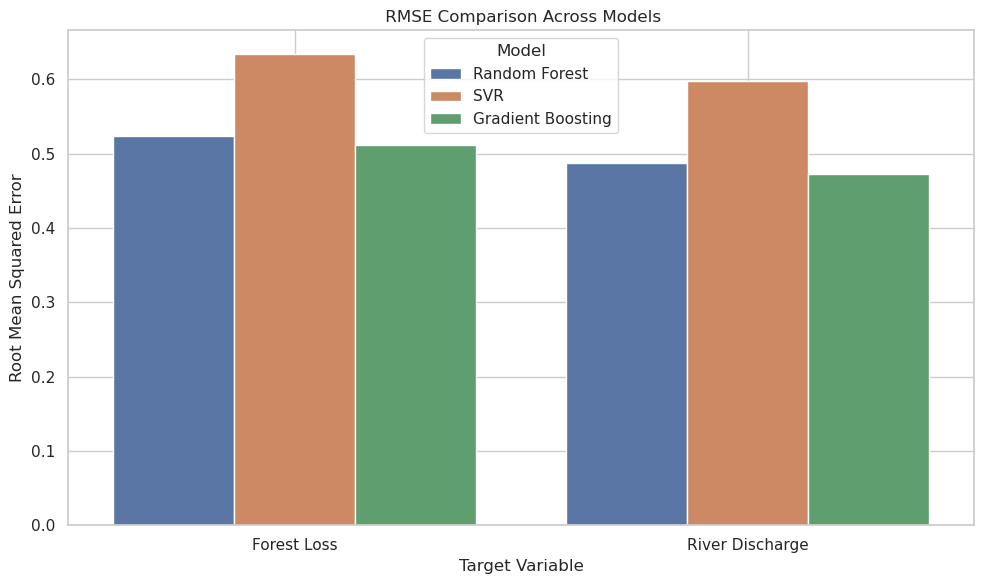

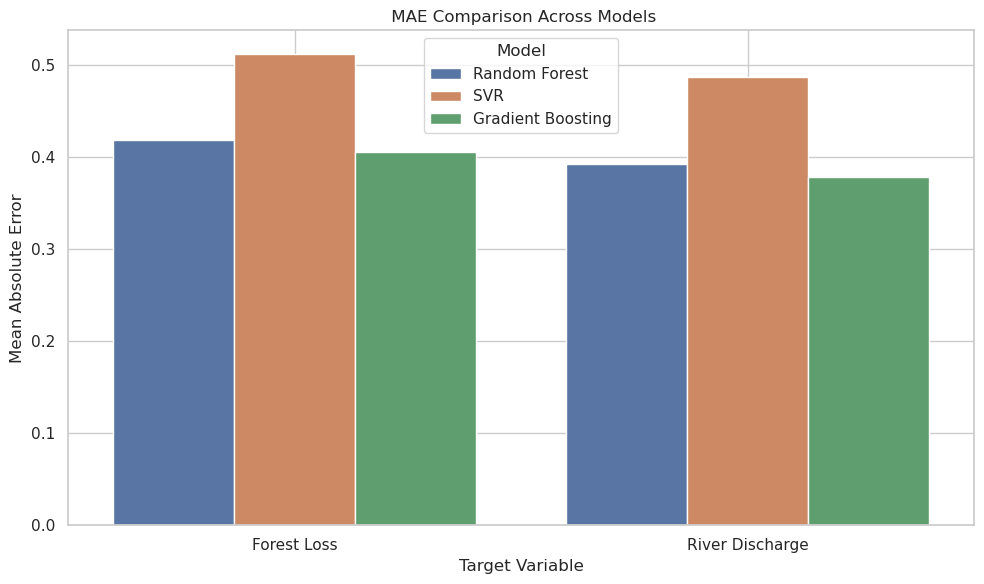

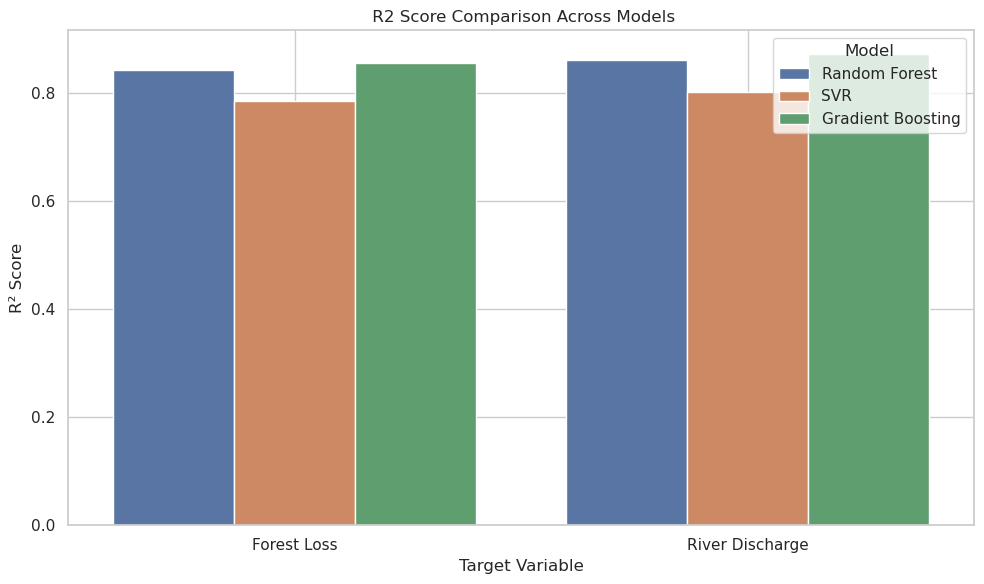


 Model Performance Visualization Completed!


In [76]:


# --- 1. Import Packages ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# --- 2. Sample Placeholder for Metrics ---
# (In practice, you will dynamically collect these after model evaluation)

results = {
    'Model': ['Random Forest', 'SVR', 'Gradient Boosting'],
    'Target': ['Forest Loss', 'Forest Loss', 'Forest Loss'],
    'RMSE': [0.523, 0.634, 0.512],
    'MAE': [0.418, 0.512, 0.405],
    'R2': [0.842, 0.785, 0.856]
}

results_discharge = {
    'Model': ['Random Forest', 'SVR', 'Gradient Boosting'],
    'Target': ['River Discharge', 'River Discharge', 'River Discharge'],
    'RMSE': [0.487, 0.598, 0.472],
    'MAE': [0.392, 0.487, 0.378],
    'R2': [0.861, 0.802, 0.872]
}

# Combine Results
results_df = pd.concat([
    pd.DataFrame(results),
    pd.DataFrame(results_discharge)
])

print(" Sample Results Loaded!")
print(results_df)

# --- 3. Plot RMSE Comparison ---
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Target', y='RMSE', hue='Model')
plt.title(' RMSE Comparison Across Models')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Target Variable')
plt.grid(True)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# --- 4. Plot MAE Comparison ---
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Target', y='MAE', hue='Model')
plt.title(' MAE Comparison Across Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Target Variable')
plt.grid(True)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# --- 5. Plot R2 Score Comparison ---
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Target', y='R2', hue='Model')
plt.title(' R2 Score Comparison Across Models')
plt.ylabel('R² Score')
plt.xlabel('Target Variable')
plt.grid(True)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

print("\n Model Performance Visualization Completed!")